****Stock Analysis****

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
import warnings

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings('ignore')

In [2]:
data_frame = pd.read_csv('ITUB4_2018-07-02_2019-01-31.csv')

In [3]:
data_frame.count()

Start                        17311
End                          17311
NegociatedOffersAmount       17311
TotalTradedQuantity          17311
RSIIndicator                 17311
SMAIndicatorDiff             17311
EMAIndicatorDiff             17311
UpperBollingerBand           17311
LowerBollingerBand           17311
MiddleBollingerBand          17311
MACD                         17311
AroonUpIndicator             17311
AroonDownIndicator           17311
AroonIndicator               17311
PlusDirectionalIndicator     17311
MinusDirectionalIndicator    17311
ADXIndicator                 17311
CCI                          17311
CMO                          17311
ROC                          17311
BuySignal                    17311
BidPrice                     17311
Profit                       17311
dtype: int64

In [4]:
len(data_frame[data_frame['BuySignal'] == 1].index)/len(data_frame.index)

0.49962451620356996

In [5]:
data_frame.head()

,Start,End,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,...,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC,BuySignal,BidPrice,Profit
0,02/07/2018 11:26:00,02/07/2018 11:29:00,111,23900,0.632353,0.062143,0.030245,0.078226,-0.202511,-0.062143,...,71.428571,15.581217,14.039384,0.000000,24.199354,81.308411,0.0,0,39.93,-0.03
1,02/07/2018 11:29:00,02/07/2018 11:32:00,105,15900,0.614286,0.020714,0.000213,0.111128,-0.152557,-0.020714,...,64.285714,13.728422,14.982204,0.000000,27.690589,34.939759,0.0,0,39.90,-0.03
2,02/07/2018 11:32:00,02/07/2018 11:35:00,107,15200,0.589041,0.001429,-0.008482,0.114624,-0.117481,-0.001429,...,50.000000,12.171190,15.955015,28.238768,9.300680,2.857143,0.0,1,39.91,0.02
3,02/07/2018 11:35:00,02/07/2018 11:38:00,101,18900,0.557143,-0.034286,-0.033351,0.141190,-0.072619,0.034286,...,50.000000,10.471839,19.033114,27.198816,7.126966,-64.864865,0.0,1,39.88,0.02
4,02/07/2018 11:38:00,02/07/2018 11:41:00,93,19200,0.541667,-0.058571,-0.046238,0.153312,-0.036169,0.058571,...,42.857143,9.344656,16.984399,30.284531,-12.062985,-95.348837,0.0,1,39.86,0.02


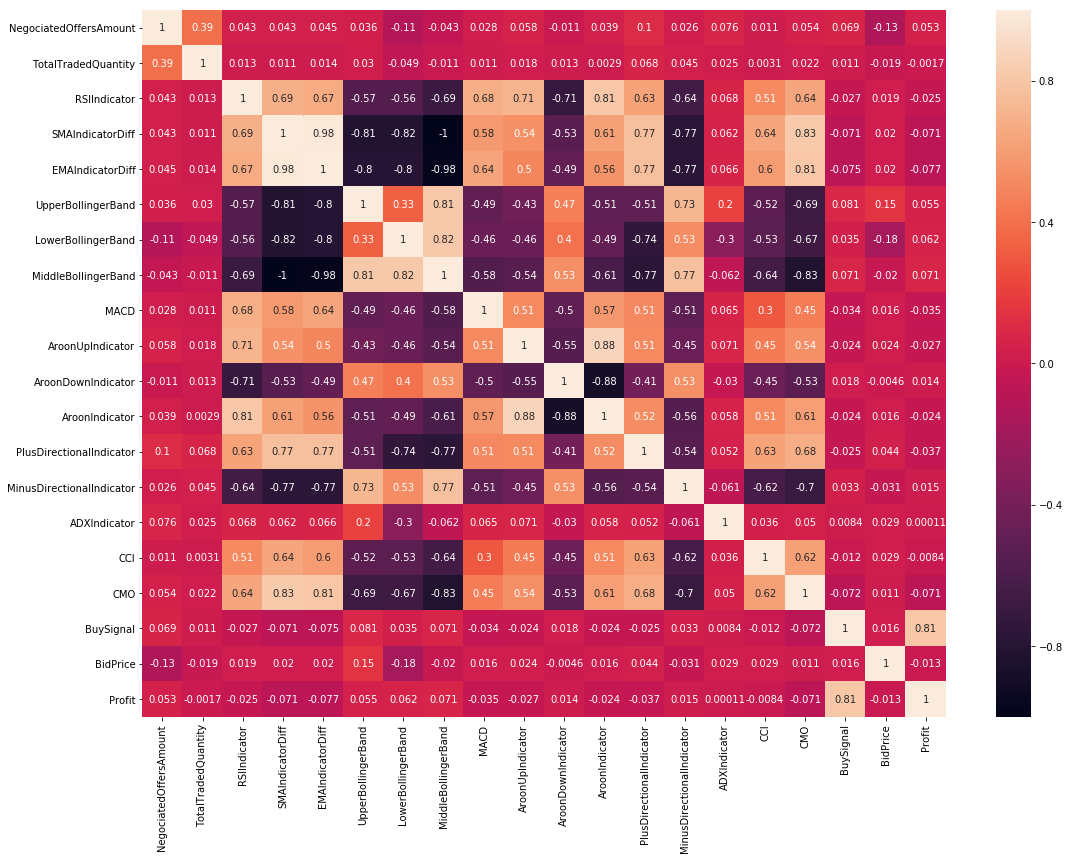

In [6]:
temp = data_frame.drop(["ROC"], axis=1)

correlation_matrix = temp.corr()
f, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(correlation_matrix, annot=True)

In [7]:
x_train = data_frame.drop(["Start", "End"], axis=1)
x_train.head()

,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,MACD,AroonUpIndicator,...,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC,BuySignal,BidPrice,Profit
0,111,23900,0.632353,0.062143,0.030245,0.078226,-0.202511,-0.062143,0.038621,78.571429,...,71.428571,15.581217,14.039384,0.000000,24.199354,81.308411,0.0,0,39.93,-0.03
1,105,15900,0.614286,0.020714,0.000213,0.111128,-0.152557,-0.020714,0.035472,71.428571,...,64.285714,13.728422,14.982204,0.000000,27.690589,34.939759,0.0,0,39.90,-0.03
2,107,15200,0.589041,0.001429,-0.008482,0.114624,-0.117481,-0.001429,0.031802,64.285714,...,50.000000,12.171190,15.955015,28.238768,9.300680,2.857143,0.0,1,39.91,0.02
3,101,18900,0.557143,-0.034286,-0.033351,0.141190,-0.072619,0.034286,0.026171,57.142857,...,50.000000,10.471839,19.033114,27.198816,7.126966,-64.864865,0.0,1,39.88,0.02
4,93,19200,0.541667,-0.058571,-0.046238,0.153312,-0.036169,0.058571,0.019866,50.000000,...,42.857143,9.344656,16.984399,30.284531,-12.062985,-95.348837,0.0,1,39.86,0.02


In [8]:
x_train['NegociatedOffersAmount'] = np.log(x_train['NegociatedOffersAmount'])
x_train['TotalTradedQuantity'] = np.log(x_train['TotalTradedQuantity'])
x_train.head()

,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,MACD,AroonUpIndicator,...,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC,BuySignal,BidPrice,Profit
0,4.709530,10.081634,0.632353,0.062143,0.030245,0.078226,-0.202511,-0.062143,0.038621,78.571429,...,71.428571,15.581217,14.039384,0.000000,24.199354,81.308411,0.0,0,39.93,-0.03
1,4.653960,9.674074,0.614286,0.020714,0.000213,0.111128,-0.152557,-0.020714,0.035472,71.428571,...,64.285714,13.728422,14.982204,0.000000,27.690589,34.939759,0.0,0,39.90,-0.03
2,4.672829,9.629051,0.589041,0.001429,-0.008482,0.114624,-0.117481,-0.001429,0.031802,64.285714,...,50.000000,12.171190,15.955015,28.238768,9.300680,2.857143,0.0,1,39.91,0.02
3,4.615121,9.846917,0.557143,-0.034286,-0.033351,0.141190,-0.072619,0.034286,0.026171,57.142857,...,50.000000,10.471839,19.033114,27.198816,7.126966,-64.864865,0.0,1,39.88,0.02
4,4.532599,9.862666,0.541667,-0.058571,-0.046238,0.153312,-0.036169,0.058571,0.019866,50.000000,...,42.857143,9.344656,16.984399,30.284531,-12.062985,-95.348837,0.0,1,39.86,0.02


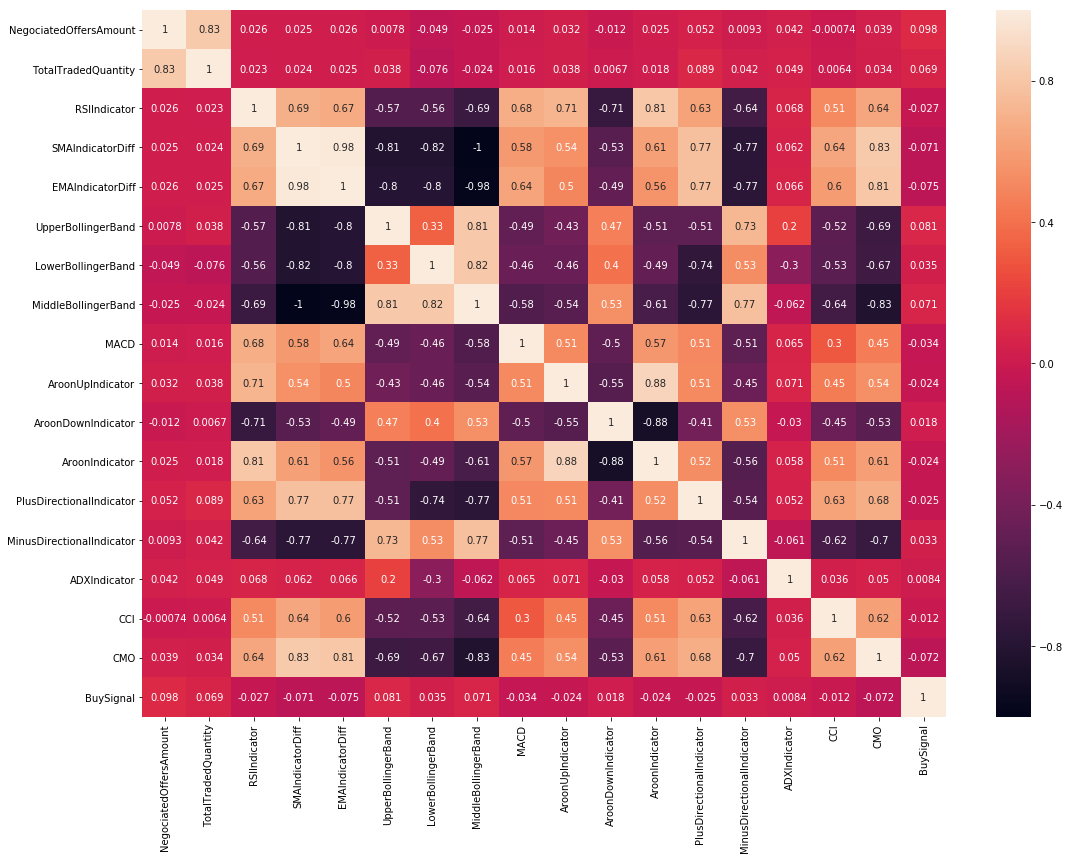

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

profit = x_train["Profit"]
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, index=x_train.index, columns=x_train.columns)
x_train.head()

temp = x_train.drop(["ROC", "BidPrice","Profit"], axis=1)

correlation_matrix = temp.corr()
f, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(correlation_matrix, annot=True)

x_train = x_train.dropna()
#y_train = x_train["BuySignal"]
x_train = x_train.drop(["BidPrice"], axis=1)

Percorrendo blocos de N dias com M intervalos de 1 minuto para mensurar acurácia balanceada:

In [10]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

average_data_per_day = 120
max_days_interval = 120
future_days_to_measure = 1
total_data = len(data_frame.index)
total_iterations = total_data//average_data_per_day
days = []
logreg_precisions = []
logreg_recalls = []
logreg_f1 = []
logreg_profit = []
mlp_precisions = []
mlp_recalls = []
mlp_f1 = []
mlp_profit = []

for i in range(max_days_interval):
    day = i + 1
    print ("Days used to train: " + str(day))
    print ("Days to be predicted: " + str(future_days_to_measure))
    acc_mlp_score_arr = []
    acc_logreg_score_arr = []
    mlp_score_arr = []
    logreg_score_arr = []
    mlp_precision_arr = []
    logreg_precision_arr = []
    mlp_recall_arr = []
    logreg_recall_arr = []
    mlp_profit_arr = []
    logreg_profit_arr = []
    mlp_f1_arr = []
    logreg_f1_arr = []
    
    for j in range(total_iterations):
        min_range = j * average_data_per_day
        middle_range = min_range + day * average_data_per_day
        max_range = middle_range + average_data_per_day
        
        if (len(x_train[min_range:middle_range].index) > 0 and len(x_train[middle_range:max_range].index) > 0):
            
            day_mlp_profit_arr = []
            day_logreg_profit_arr = []
            #print("(MiddleRange,MaxRange): (" + str(middle_range) + "," + str (max_range) + ")")
            new_mlp = MLPClassifier(hidden_layer_sizes=[100], max_iter=1000)
            
            current_profit = profit[middle_range:max_range]
            
            #print ("Distribution before: " + str(len(x_train[min_range:middle_range][x_train[min_range:middle_range]['BuySignal'] == 1].index)/len(x_train[min_range:middle_range].index)))
            
            g = x_train[min_range:middle_range].groupby('BuySignal')
            x_train_balanced = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
            #print ("Distribution after: " + str(len(x_train_balanced[x_train_balanced['BuySignal'] == 1].index)/len(x_train_balanced.index)))
            
            new_mlp.fit(x_train_balanced.drop(["BuySignal", "Profit"], axis=1), x_train_balanced["BuySignal"])
            y_predict = new_mlp.predict(x_train[middle_range:max_range].drop(["BuySignal", "Profit"], axis=1))
            
            for s in range(len(y_predict)):
                if y_predict[s] == 1:
                    day_mlp_profit_arr.append(current_profit.as_matrix()[s])
            
            #print("MLP (tn, fp, fn, tp): " + str(confusion_matrix(y_train[middle_range:max_range], y_predict).ravel()))
            #print("MLP Precision: " + str(precision_score(y_train[middle_range:max_range], y_predict, average = 'binary', pos_label=1)))
            mlp_precision_arr.append(precision_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            mlp_recall_arr.append(recall_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            mlp_f1_arr.append(f1_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            
            acc_mlp_score = accuracy_score(x_train[middle_range:max_range]["BuySignal"], y_predict)
            acc_mlp_score_arr.append(acc_mlp_score)
            mlp_score = balanced_accuracy_score(x_train[middle_range:max_range]["BuySignal"], y_predict)
            mlp_score_arr.append(mlp_score)
            
            new_logreg = LogisticRegression(C=100)
            new_logreg.fit(x_train_balanced.drop(["BuySignal", "Profit"], axis=1), x_train_balanced["BuySignal"])
            y_predict = new_logreg.predict(x_train[middle_range:max_range].drop(["BuySignal", "Profit"], axis=1))
            
            for s in range(len(y_predict)):
                if y_predict[s] == 1:
                    day_logreg_profit_arr.append(current_profit.as_matrix()[s])
                  
            #print("LogReg (tn, fp, fn, tp): " + str(confusion_matrix(y_train[middle_range:max_range], y_predict).ravel()))
            #print("LogReg Precision: " + str(precision_score(y_train[middle_range:max_range], y_predict, average = 'binary', pos_label=1)))     
            logreg_precision_arr.append(precision_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            logreg_recall_arr.append(recall_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            logreg_f1_arr.append(f1_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            
            acc_logreg_score = accuracy_score(x_train[middle_range:max_range]["BuySignal"], y_predict)
            acc_logreg_score_arr.append(acc_logreg_score)
            logreg_score = balanced_accuracy_score(x_train[middle_range:max_range]["BuySignal"], y_predict)
            logreg_score_arr.append(logreg_score)
            
            mlp_profit_arr.append(np.sum(day_mlp_profit_arr))
            logreg_profit_arr.append(np.sum(day_logreg_profit_arr))
      
    print ("MLP Average Accuracy Score: " + str(np.sum(acc_mlp_score_arr)/len(acc_mlp_score_arr)))
    print ("MLP Average Balanced Accuracy Score: " + str(np.sum(mlp_score_arr)/len(mlp_score_arr)))  
    print ("MLP Average Precision Score: " + str(np.sum(mlp_precision_arr)/len(mlp_precision_arr)))
    print ("MLP Average Recall Score: " + str(np.sum(mlp_recall_arr)/len(mlp_recall_arr)))
    print ("MLP Average f1 Score: " + str(np.sum(mlp_f1_arr)/len(mlp_f1_arr)))
    print ("MLP Average Profit: " + str(np.sum(mlp_profit_arr)/len(mlp_profit_arr)))
      
    print ("LogReg Average Accuracy Score: " + str(np.sum(acc_logreg_score_arr)/len(acc_logreg_score_arr))) 
    print ("LogReg Average Balanced Accuracy Score: " + str(np.sum(logreg_score_arr)/len(logreg_score_arr)))  
    print ("LogReg Average Precision Score: " + str(np.sum(logreg_precision_arr)/len(logreg_precision_arr)))
    print ("LogReg Average Recall Score: " + str(np.sum(logreg_recall_arr)/len(logreg_recall_arr)))
    print ("LogReg Average f1 Score: " + str(np.sum(logreg_f1_arr)/len(logreg_f1_arr)))
    print ("LogReg Average Profit: " + str(np.sum(logreg_profit_arr)/len(logreg_profit_arr)))
    
    logreg_precisions.append(np.sum(logreg_precision_arr)/len(logreg_precision_arr))
    logreg_recalls.append(np.sum(logreg_recall_arr)/len(logreg_recall_arr))
    logreg_f1.append(np.sum(logreg_f1_arr)/len(logreg_f1_arr))
    logreg_profit.append(np.sum(logreg_profit_arr)/len(logreg_profit_arr))
    mlp_precisions.append(np.sum(mlp_precision_arr)/len(mlp_precision_arr))
    mlp_recalls.append(np.sum(mlp_recall_arr)/len(mlp_recall_arr))
    mlp_f1.append(np.sum(mlp_f1_arr)/len(mlp_f1_arr))
    mlp_profit.append(np.sum(mlp_profit_arr)/len(mlp_profit_arr))
    days.append(day)

Days used to train: 1
Days to be predicted: 1
MLP Average Accuracy Score: 0.5129368279569894
MLP Average Balanced Accuracy Score: 0.5136025663019402
MLP Average Precision Score: 0.5147861915632189
MLP Average Recall Score: 0.5008361029591644
MLP Average f1 Score: 0.4930393638360737
MLP Average Profit: 0.14298611111111081
LogReg Average Accuracy Score: 0.5216677867383512
LogReg Average Balanced Accuracy Score: 0.5208107215730634
LogReg Average Precision Score: 0.5213771887826657
LogReg Average Recall Score: 0.5214487661773308
LogReg Average f1 Score: 0.5044614135795542
LogReg Average Profit: 0.17173611111111015
Days used to train: 2
Days to be predicted: 1
MLP Average Accuracy Score: 0.5167719377396797
MLP Average Balanced Accuracy Score: 0.5167585261407639
MLP Average Precision Score: 0.5062991021165018
MLP Average Recall Score: 0.5114432320285224
MLP Average f1 Score: 0.4751521368453195
MLP Average Profit: 0.17293706293706126
LogReg Average Accuracy Score: 0.5308237461463268
LogReg Av

MLP Average Accuracy Score: 0.5438254755996691
MLP Average Balanced Accuracy Score: 0.5402725658191555
MLP Average Precision Score: 0.5410875439715261
MLP Average Recall Score: 0.5582450701491735
MLP Average f1 Score: 0.5377334501455496
MLP Average Profit: 0.23515384615384555
LogReg Average Accuracy Score: 0.5558209263854424
LogReg Average Balanced Accuracy Score: 0.5519875015727066
LogReg Average Precision Score: 0.5563895632728713
LogReg Average Recall Score: 0.5578241181771251
LogReg Average f1 Score: 0.5429169519678523
LogReg Average Profit: 0.2628461538461533
Days used to train: 16
Days to be predicted: 1
MLP Average Accuracy Score: 0.5426877552721513
MLP Average Balanced Accuracy Score: 0.539890285297518
MLP Average Precision Score: 0.5379648828814955
MLP Average Recall Score: 0.570795894808358
MLP Average f1 Score: 0.540766460649918
MLP Average Profit: 0.23612403100775153
LogReg Average Accuracy Score: 0.5520463449195633
LogReg Average Balanced Accuracy Score: 0.5478222961811208

MLP Average Accuracy Score: 0.5427118094178717
MLP Average Balanced Accuracy Score: 0.5368746010659726
MLP Average Precision Score: 0.5416295494387895
MLP Average Recall Score: 0.5646657749420055
MLP Average f1 Score: 0.536735817640733
MLP Average Profit: 0.2518103448275863
LogReg Average Accuracy Score: 0.5550866703744903
LogReg Average Balanced Accuracy Score: 0.5487369644237589
LogReg Average Precision Score: 0.5554593985758484
LogReg Average Recall Score: 0.5585929854680747
LogReg Average f1 Score: 0.544731533856606
LogReg Average Profit: 0.27206896551724113
Days used to train: 30
Days to be predicted: 1
MLP Average Accuracy Score: 0.5460004675081814
MLP Average Balanced Accuracy Score: 0.5436612844356716
MLP Average Precision Score: 0.5505974860170316
MLP Average Recall Score: 0.5592343912260661
MLP Average f1 Score: 0.5394671572143354
MLP Average Profit: 0.2538260869565214
LogReg Average Accuracy Score: 0.5573048153342683
LogReg Average Balanced Accuracy Score: 0.5508570161663077

MLP Average Accuracy Score: 0.5490037950664136
MLP Average Balanced Accuracy Score: 0.5399639016860537
MLP Average Precision Score: 0.5476642037119743
MLP Average Recall Score: 0.5728714651057195
MLP Average f1 Score: 0.5462163424204309
MLP Average Profit: 0.2594117647058825
LogReg Average Accuracy Score: 0.5539057558507273
LogReg Average Balanced Accuracy Score: 0.5456071457943179
LogReg Average Precision Score: 0.5528648713310942
LogReg Average Recall Score: 0.5710440874105374
LogReg Average f1 Score: 0.5516314744322905
LogReg Average Profit: 0.26921568627451
Days used to train: 44
Days to be predicted: 1
MLP Average Accuracy Score: 0.5471787501330777
MLP Average Balanced Accuracy Score: 0.5429146054790797
MLP Average Precision Score: 0.552235699740581
MLP Average Recall Score: 0.5836902262790783
MLP Average f1 Score: 0.5524321211689845
MLP Average Profit: 0.2518811881188119
LogReg Average Accuracy Score: 0.5549345257106356
LogReg Average Balanced Accuracy Score: 0.5459870475028809
L

MLP Average Accuracy Score: 0.543838587487781
MLP Average Balanced Accuracy Score: 0.53711202219196
MLP Average Precision Score: 0.548821044920891
MLP Average Recall Score: 0.6027919036928726
MLP Average f1 Score: 0.5623274953481378
MLP Average Profit: 0.26920454545454536
LogReg Average Accuracy Score: 0.5586113147605083
LogReg Average Balanced Accuracy Score: 0.5482700824744294
LogReg Average Precision Score: 0.5607962907924899
LogReg Average Recall Score: 0.5895046073942197
LogReg Average f1 Score: 0.5665344009778632
LogReg Average Profit: 0.3018181818181816
Days used to train: 58
Days to be predicted: 1
MLP Average Accuracy Score: 0.5496817451489309
MLP Average Balanced Accuracy Score: 0.5404660269972227
MLP Average Precision Score: 0.5543219851829256
MLP Average Recall Score: 0.5852263709171538
MLP Average f1 Score: 0.5553080019740334
MLP Average Profit: 0.2760919540229886
LogReg Average Accuracy Score: 0.5621585712520085
LogReg Average Balanced Accuracy Score: 0.5520530904508106
L

MLP Average Accuracy Score: 0.5504286544609126
MLP Average Balanced Accuracy Score: 0.5453884349443698
MLP Average Precision Score: 0.5577949353173204
MLP Average Recall Score: 0.5891947494304076
MLP Average f1 Score: 0.5586094861414134
MLP Average Profit: 0.30108108108108095
LogReg Average Accuracy Score: 0.5620277535600116
LogReg Average Balanced Accuracy Score: 0.5506949736345556
LogReg Average Precision Score: 0.5646710922843698
LogReg Average Recall Score: 0.5876617691556903
LogReg Average f1 Score: 0.5678910113519018
LogReg Average Profit: 0.31364864864864866
Days used to train: 72
Days to be predicted: 1
MLP Average Accuracy Score: 0.5524893209603771
MLP Average Balanced Accuracy Score: 0.5473407886213485
MLP Average Precision Score: 0.5607828770535793
MLP Average Recall Score: 0.6115365276758357
MLP Average f1 Score: 0.5696436633267896
MLP Average Profit: 0.30082191780821904
LogReg Average Accuracy Score: 0.5643614670790985
LogReg Average Balanced Accuracy Score: 0.553421435980

MLP Average Accuracy Score: 0.5542428315412186
MLP Average Balanced Accuracy Score: 0.5458292156897623
MLP Average Precision Score: 0.5549673278026171
MLP Average Recall Score: 0.6027727405370349
MLP Average f1 Score: 0.5578168245132609
MLP Average Profit: 0.2989999999999994
LogReg Average Accuracy Score: 0.5642965949820787
LogReg Average Balanced Accuracy Score: 0.5533265875311145
LogReg Average Precision Score: 0.5590476677063267
LogReg Average Recall Score: 0.6050310047821645
LogReg Average f1 Score: 0.5726744260074963
LogReg Average Profit: 0.31566666666666593
Days used to train: 86
Days to be predicted: 1
MLP Average Accuracy Score: 0.5500956806998359
MLP Average Balanced Accuracy Score: 0.5429134357982828
MLP Average Precision Score: 0.5536558113932111
MLP Average Recall Score: 0.5957496608878831
MLP Average f1 Score: 0.5577689495729189
MLP Average Profit: 0.27983050847457563
LogReg Average Accuracy Score: 0.5627027519591762
LogReg Average Balanced Accuracy Score: 0.5515289087427

MLP Average Accuracy Score: 0.5727910238429174
MLP Average Balanced Accuracy Score: 0.5598598882026707
MLP Average Precision Score: 0.5664172318084884
MLP Average Recall Score: 0.6066995047265054
MLP Average f1 Score: 0.5678449413584243
MLP Average Profit: 0.3280434782608689
LogReg Average Accuracy Score: 0.5650245441795232
LogReg Average Balanced Accuracy Score: 0.5532076205600801
LogReg Average Precision Score: 0.5514952563091929
LogReg Average Recall Score: 0.6283296026853504
LogReg Average f1 Score: 0.5785986394386411
LogReg Average Profit: 0.32152173913043425
Days used to train: 100
Days to be predicted: 1
MLP Average Accuracy Score: 0.5416308243727598
MLP Average Balanced Accuracy Score: 0.5468038872242447
MLP Average Precision Score: 0.5520569845779163
MLP Average Recall Score: 0.5849700980404161
MLP Average f1 Score: 0.5475755738963561
MLP Average Profit: 0.2715555555555539
LogReg Average Accuracy Score: 0.5664695340501792
LogReg Average Balanced Accuracy Score: 0.5542760566487

MLP Average Accuracy Score: 0.5593245967741935
MLP Average Balanced Accuracy Score: 0.5498321906281809
MLP Average Precision Score: 0.5416891794871017
MLP Average Recall Score: 0.5959102290756154
MLP Average f1 Score: 0.5546732333955458
MLP Average Profit: 0.27531250000000107
LogReg Average Accuracy Score: 0.5632644489247312
LogReg Average Balanced Accuracy Score: 0.5518368862456837
LogReg Average Precision Score: 0.5434265056467059
LogReg Average Recall Score: 0.6411416466869859
LogReg Average f1 Score: 0.5806137157180356
LogReg Average Profit: 0.3075000000000009
Days used to train: 114
Days to be predicted: 1
MLP Average Accuracy Score: 0.5604318418314257
MLP Average Balanced Accuracy Score: 0.551359196633549
MLP Average Precision Score: 0.5537590433400287
MLP Average Recall Score: 0.5601428570290328
MLP Average f1 Score: 0.5443100621992478
MLP Average Profit: 0.26032258064516256
LogReg Average Accuracy Score: 0.5634235171696149
LogReg Average Balanced Accuracy Score: 0.5515129029369

In [15]:
def performance_plot(days, precision, recall, f1, figsize, title, precision_xytextpos, recall_xytextpos, f1_xytextpos):

    plt.figure(1, figsize=figsize)

    plt.subplot(111)
    lines = plt.plot(days, precision, days, recall, days, f1)
    plt.setp(lines[0], linewidth=2)
    plt.setp(lines[1], linewidth=2)
    plt.setp(lines[2], linewidth=2)
    plt.legend(('Precisões', 'Realocações', 'F1'),
            loc='lower right')
    plt.title(title)

    xy_precision = (precision.index(max(precision)) + 1, max(precision))
    xy_recall = (recall.index(max(recall)) + 1, max(recall))
    xy_f1 = (f1.index(max(f1)) + 1, max(f1))

    plt.annotate(str(xy_precision), xy=xy_precision, xytext=precision_xytextpos,
                arrowprops=dict(facecolor='black', shrink=0.05),
                )

    plt.annotate(str(xy_recall), xy=xy_recall, xytext=recall_xytextpos,
                arrowprops=dict(facecolor='black', shrink=0.05),
                )

    plt.annotate(str(xy_f1), xy=xy_f1, xytext=f1_xytextpos,
                arrowprops=dict(facecolor='black', shrink=0.05),
                )
    
    plt.ylim(0.5, .7)
    plt.ylabel('Performance')
    plt.xlabel('Dias de Treino')
    plt.xlim(1,120)
    plt.show()

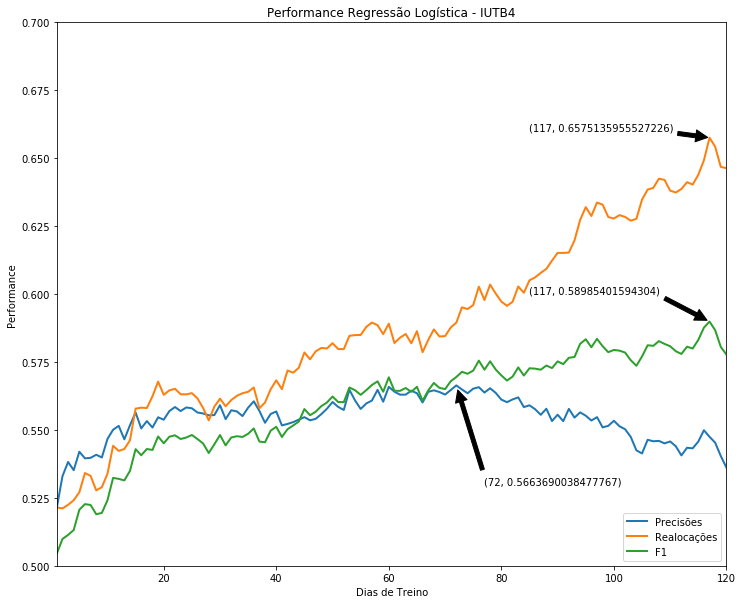

In [21]:
performance_plot(days, logreg_precisions, logreg_recalls, logreg_f1,(12,10), 'Performance Regressão Logística - IUTB4', (77, 0.53),(85, 0.66),(85, 0.6))

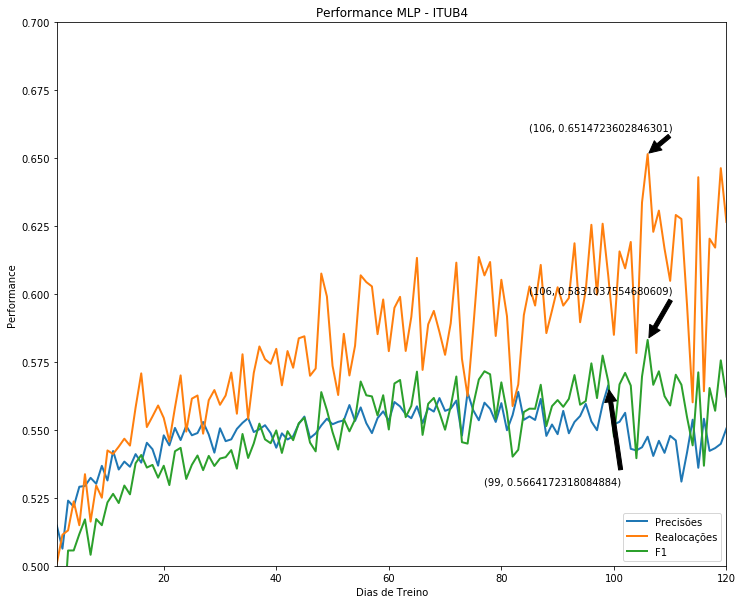

In [22]:
performance_plot(days, mlp_precisions, mlp_recalls, mlp_f1, (12,10), 'Performance MLP - ITUB4', (77, 0.53),(85, 0.66),(85, 0.6))

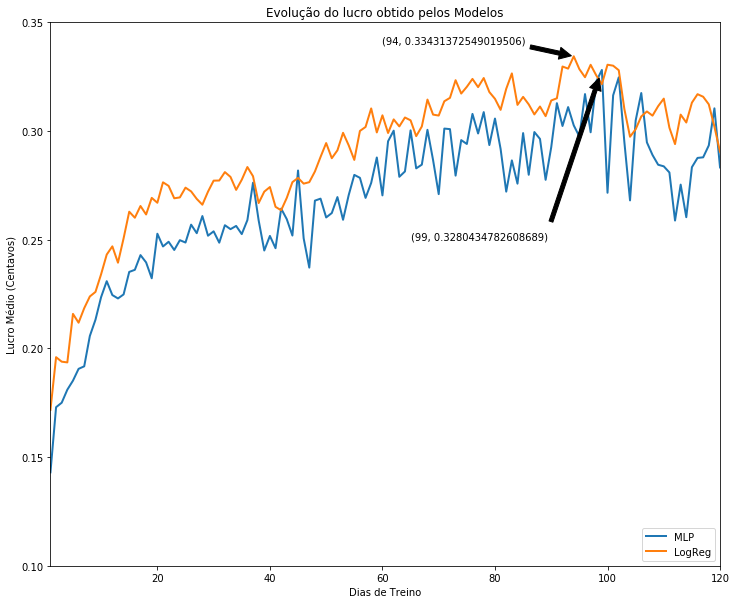

In [27]:
plt.figure(1, figsize=(12,10))

plt.subplot(111)
lines = plt.plot(days, mlp_profit, days, logreg_profit)
plt.setp(lines[0], linewidth=2)
plt.setp(lines[1], linewidth=2)
plt.legend(('MLP', 'LogReg'),
        loc='lower right')
plt.title("Evolução do lucro obtido pelos Modelos")

xy_mlp = (mlp_profit.index(max(mlp_profit)) + 1, max(mlp_profit))
xy_logreg = (logreg_profit.index(max(logreg_profit)) + 1, max(logreg_profit))

plt.annotate(str(xy_mlp), xy=xy_mlp, xytext=(65,0.25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate(str(xy_logreg), xy=xy_logreg, xytext=(60,0.34),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(0.1, 0.35)
plt.xlim(1,120)
plt.ylabel('Lucro Médio (Centavos)')
plt.xlabel('Dias de Treino')
plt.show()